<a href="https://colab.research.google.com/github/raamiiChu/NCCU_110-2_Applications-of-mathematics-softwares-homework/blob/main/0321_%E4%BD%9C%E6%A5%AD/0321_%E4%BD%9C%E6%A5%AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#FF0000>更改處皆以紅色字體標示在對應程式碼上方</font>



### 更改概要


1.   匯入 Adam 優化器

2.   新增一個隱藏層
3.   神經元個數分別修改為 50, 100, 200
4.   激發函數修改為 "sigmoid"
5.   loss function 修改為 "squared_hinge"
6.   優化器修改為 Adam
7.   learning rate 修改為 0.005
8.   batch size 修改為 300
9.   epochs 修改為 50
10.  從 ipywidgets 匯入 interact 模組

### 0. 匯入相關模組

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font color=#FF0000>匯入 Adam 優化器</font> （原本是SGD）

In [ ]:
from tensorflow.keras.utils import to_categorical  # one hot encoding
from tensorflow.keras.models import Sequential  # 函數學習機
from tensorflow.keras.layers import Dense  # 隱藏層
from tensorflow.keras.optimizers import Adam  # 優化器(學習方法)

### 1. 讀入 MNIST 數據集

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

(10000,)

In [ ]:
n = 9000

In [ ]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  41, 239, 253, 253, 253,
        174,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 175, 251, 251, 251, 251,
        173,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[n]

6

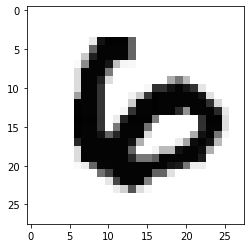

In [ ]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [ ]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

*   <font color=#FF0000>新增一個隱藏層</font>
*   <font color=#FF0000>神經元個數分別修改為 50, 100, 200</font>
*   <font color=#FF0000>激發函數修改為 "sigmoid" （課堂上有提到過）</font>

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(50, input_dim=784, activation='sigmoid'))  # (神經元個數, 輸入維度, 激發函數)

In [ ]:
model.add(Dense(100, activation='sigmoid'))

In [ ]:
model.add(Dense(200, activation='sigmoid'))

In [ ]:
model.add(Dense(10, activation='softmax'))  # 加起來等於1

#### 組裝我們的神經網路

[loss function 相關解釋文章（簡中）](https://blog.csdn.net/lyb3b3b/article/details/76962651)
*   <font color=#FF0000>loss function 修改為 "squared_hinge"</font>
*   <font color=#FF0000>優化器修改為 Adam</font>
*   <font color=#FF0000>learning rate 修改為 0.005</font>

In [ ]:
model.compile(loss='squared_hinge', optimizer=Adam(learning_rate=0.005), 
              metrics=['accuracy'])

#### 欣賞我們的作品

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 200)               20200     
                                                                 
 dense_3 (Dense)             (None, 10)                2010      
                                                                 
Total params: 66,560
Trainable params: 66,560
Non-trainable params: 0
_________________________________________________________________


### 5. step 2: 訓練

*   <font color=#FF0000>batch size 修改為 300</font>
*   <font color=#FF0000>epochs 修改為 50</font>

In [ ]:
model.fit(x_train, y_train, batch_size=300, epochs=50)

Epoch 1/50
200/200 [==============================] - 2s 5ms/step - loss: 0.9963 - accuracy: 0.7390
Epoch 2/50
200/200 [==============================] - 1s 5ms/step - loss: 0.9261 - accuracy: 0.9338
Epoch 3/50
200/200 [==============================] - 1s 5ms/step - loss: 0.9198 - accuracy: 0.9495
Epoch 4/50
200/200 [==============================] - 1s 5ms/step - loss: 0.9166 - accuracy: 0.9575
Epoch 5/50
200/200 [==============================] - 1s 5ms/step - loss: 0.9148 - accuracy: 0.9620
Epoch 6/50
200/200 [==============================] - 1s 5ms/step - loss: 0.9135 - accuracy: 0.9650
Epoch 7/50
200/200 [==============================] - 1s 5ms/step - loss: 0.9120 - accuracy: 0.9692
Epoch 8/50
200/200 [==============================] - 1s 5ms/step - loss: 0.9112 - accuracy: 0.9710
Epoch 9/50
200/200 [==============================] - 1s 5ms/step - loss: 0.9102 - accuracy: 0.9735
Epoch 10/50
200/200 [==============================] - 1s 5ms/step - loss: 0.9098 - accuracy: 0.9748

### 6. step 3: 預測 (testing)

我們用互動模式展示我們的訓練成果。

<font color=#FF0000>從 ipywidgets 匯入 interact 模組</font> （原本是 interact_manual）

In [ ]:
from ipywidgets import interact

y_predict = np.argmax(model.predict(x_test), axis=-1)

def test(測試編號):
    plt.imshow(x_test[測試編號].reshape(28,28), cmap='Greys')
    print('神經網路判斷為:', y_predict[測試編號])

<font color=#FF0000>互動介面少了一個確認紐，若直接拖曳數值，資料就會同步進行變更</font>

In [ ]:
interact(test, 測試編號=(0, 9999));

interactive(children=(IntSlider(value=4999, description='測試編號', max=9999), Output()), _dom_classes=('widget-in…

到底測試資料總的狀況如何呢? 我們可以給我們神經網路「總評量」。

In [ ]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9139 - accuracy: 0.9639


In [ ]:
print('loss:', score[0])
print('正確率', score[1])

loss: 0.9138870239257812
正確率 0.9639000296592712


### 7. 儲存我們的 model

如果對訓練成果滿意, 我們當然不想每次都再訓練一次! 我們可以把神經網路的架構和訓練好的參數都存起來, 以供日後使用!

在 Colab 上, 我們要先連到自己的 Google Drive。

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

再來是 cd 到你的資料夾中, 我們通常是放到自己 Colab Notebooks 中, 自然你可以指定其他的資料夾。

In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

In [ ]:
model.save('my_dnn_model')